# Locally Weighted Linear Regression Using Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# generating data
X = np.linspace(-7.0, 7.0, 500)
y = 2.0 + X**3 + np.random.rand(X.shape[0])
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

data = np.hstack((X, y))
data = np.hstack((np.ones((data.shape[0], 1)), data))
np.random.shuffle(data)

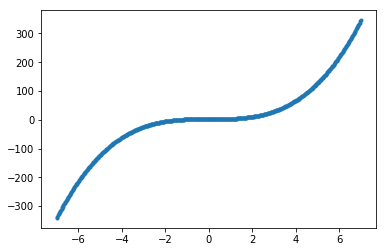

In [3]:
# visualising data
plt.scatter(data[:, 1], data[:, -1], marker = '.')
plt.show()

In [4]:
# train-test-split
split_factor = 0.9
split = int(split_factor*data.shape[0])

X_train = data[:split, :-1]
y_train = data[:split, -1].reshape((-1, 1))

X_test = data[split: , :-1]
y_test = data[split:, -1].reshape((-1, 1))

print("Number of examples in training set = " + str(X_train.shape[0]))
print("Number of examples in testing set = " + str(X_test.shape[0]))

Number of examples in training set = 450
Number of examples in testing set = 50


In [5]:
def hypothesis(x, theta):
    return np.dot(x, theta)

def gradient(x, y, theta):
    h = hypothesis(x, theta)
    grad = np.dot(x.transpose(), (h - y))
    return grad

def cost(x, y, theta):
    h = hypothesis(x, theta)
    J = np.dot((h - y).transpose(), (h - y))
    J /= 2
    return J
    
def weight(x, x_test, t):
    dist = np.linalg.norm(x - x_test)
    w = np.exp((-1.0*(dist**2)) / (2.0*(t**2)))
    return w

def predict(X, y, x_test, u = 0.01, t = 0.05):
    theta = np.zeros((X.shape[1], 1))
    error_list = []
    max_itr = 750
    for itr in range(max_itr):
        theta_temp = theta
        for i in range(X.shape[0]):
            x = X[i, :].reshape((1, -1))
            w = weight(x, x_test, t)
            theta_temp = theta_temp - u*w*gradient(x, y[i], theta)
        theta = theta_temp
        error_list.append(cost(X, y, theta)[0])
    pred = hypothesis(x_test, theta)[0]
    return pred, error_list

In [6]:
# computing y_pred
y_pred = []
for i in range(X_test.shape[0]):
    x_test = X_test[i, :].reshape((1, -1))
    pred, error_list = predict(X_train, y_train, x_test)
    y_pred.append(pred)
    if i % 5 == 0:
        print("y_pred = %.3f"%(pred[0]) + "    y_test = %.3f"%(y_test[i][0]))
y_pred = np.array(y_pred).reshape((-1, 1))

y_pred = -56.327    y_test = -56.042
y_pred = -0.010    y_test = 0.076
y_pred = 4.370    y_test = 4.055
y_pred = -69.939    y_test = -70.119
y_pred = 2.974    y_test = 2.645
y_pred = -1.202    y_test = -0.445
y_pred = 2.048    y_test = 2.430
y_pred = -53.487    y_test = -54.037
y_pred = -8.447    y_test = -8.585
y_pred = -5.770    y_test = -5.273


In [7]:
# calculating error in predictions
error = np.sum(np.abs(y_test - y_pred) / y_test.shape[0])
print("Mean absolute error = ", error)

Mean absolute error =  0.30572127677413274


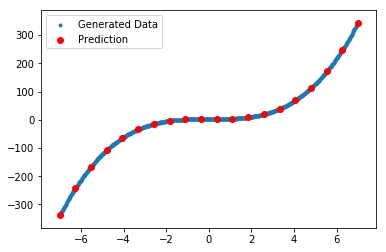

In [8]:
# plot prediction
X_temp = np.linspace(-7.0, 7.0, 20).reshape(-1, 1)
X_plot = np.hstack((np.ones((X_temp.shape[0], 1)), X_temp))
y_plot = []
for i in range(X_plot.shape[0]):
    x = X_plot[i].reshape((1, -1))
    y, _ = predict(X_train, y_train, x)
    y_plot.append(y)
y_plot = np.array(y_plot).reshape((-1, 1))
plt.scatter(data[:, 1], data[:, -1], marker = '.', label = "Generated Data")
plt.scatter(X_plot[:, 1], y_plot, color = "red", label = "Prediction")
plt.legend()
plt.show()

# Locally Weighted Linear Regression Using Closed Form Solution

In [9]:
def weights(X, x_test, t):
    dist = np.linalg.norm(X - x_test, axis = 1)
    m = X.shape[0]
    W = np.zeros((m, m))
    for i in range(m):
        W[i][i] = np.exp((-1.0*(dist[i]**2)) / (2.0*(t**2)))
    return W

def predict(X, y, x_test, t = 0.05):
    W = weights(X, x_test, t)
    X = np.mat(X)
    Y = np.mat(y)
    W = np.mat(W)
    theta = np.linalg.pinv(X.T*W*X)*X.T*W*Y
    pred = hypothesis(x_test, theta)
    return pred

In [10]:
y_pred = []
for i in range(X_test.shape[0]):
    x_test = X_test[i].reshape((1, -1))
    pred = predict(X_train, y_train, x_test)
    y_pred.append(pred[0])
    if i % 5 == 0:
        print("y_pred = %.3f"%(pred[0]) + "    y_test = %.3f"%(y_test[i][0]))
y_pred = np.array(y_pred).reshape((-1, 1))

y_pred = -55.958    y_test = -56.042
y_pred = -0.070    y_test = 0.076
y_pred = 4.369    y_test = 4.055
y_pred = -69.915    y_test = -70.119
y_pred = 3.007    y_test = 2.645
y_pred = -1.116    y_test = -0.445
y_pred = 2.050    y_test = 2.430
y_pred = -53.564    y_test = -54.037
y_pred = -8.554    y_test = -8.585
y_pred = -5.674    y_test = -5.273


In [11]:
# calculating error in predictions
error = np.sum(np.abs(y_test - y_pred) / y_test.shape[0])
print("Mean absolute error = ", error)

Mean absolute error =  0.25006753346597593


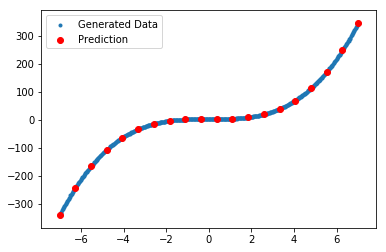

In [12]:
# plot prediction
X_temp = np.linspace(-7.0, 7.0, 20).reshape(-1, 1)
X_plot = np.hstack((np.ones((X_temp.shape[0], 1)), X_temp))
y_plot = []
for i in range(X_plot.shape[0]):
    x = X_plot[i].reshape((1, -1))
    y = predict(X_train, y_train, x)
    y_plot.append(y)
plt.scatter(data[:, 1], data[:, -1], marker = '.', label = "Generated Data")
plt.scatter(X_plot[:, 1], y_plot, color = "red", label = "Prediction")
plt.legend()
plt.show()